In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load CSV files
# Replace 'path_to_edge_list.csv' and 'path_to_node_attributes.csv' with the actual paths to your CSV files
edges_df = pd.read_csv('rfid_lyon_contacts.csv')
nodes_df = pd.read_csv('rfid_lyon_people.csv')


In [3]:

# Create an undirected graph with support for multiple edges
G_multi = nx.MultiGraph()

# Add nodes with attributes
for idx, row in nodes_df.iterrows():
    G_multi.add_node(row['ID'], status=row['status'])

# Add edges with attributes
for idx, row in edges_df.iterrows():
    G_multi.add_edge(row['ID1'], row['ID2'], time=row['time'])

G = nx.Graph(G_multi)

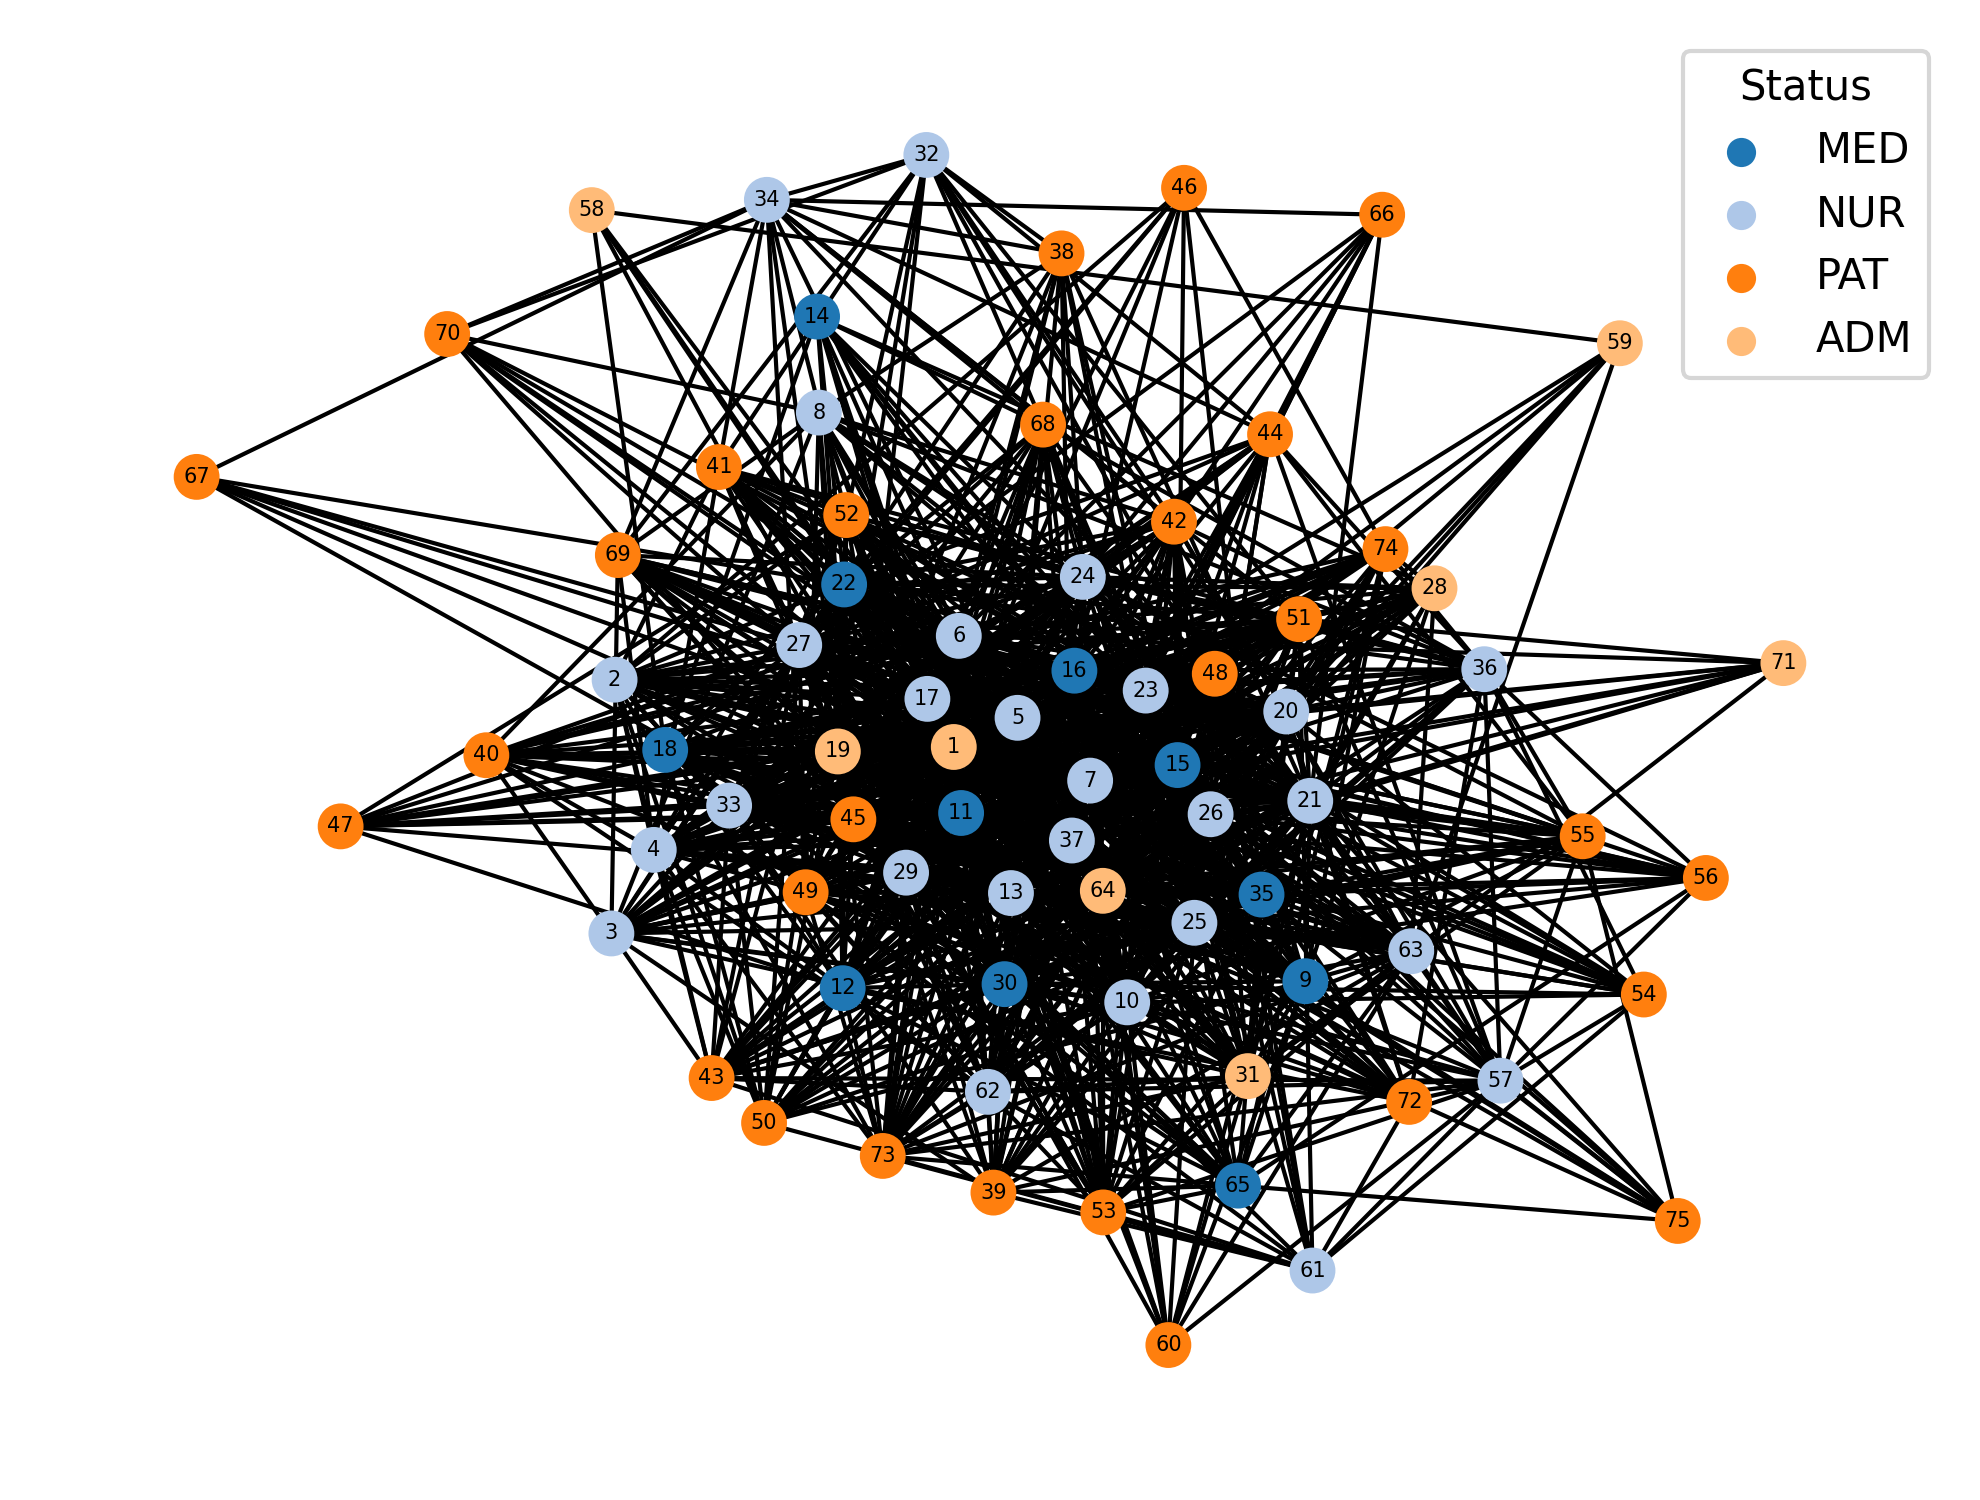

In [4]:
# Save the figure with high resolution
plt.figure(dpi=300)  

# Define a color map based on the unique statuses
unique_statuses = set(nodes_df['status'])
color_map = {status: plt.cm.tab20(i) for i, status in enumerate(unique_statuses)}

# Apply colors based on the 'status' attribute
node_colors = [color_map[G.nodes[node]['status']] for node in G]

# Visualize the graph
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=100, edge_color='k', linewidths=1, font_size=5)

# Create a legend
for status, color in color_map.items():
    plt.scatter([], [], color=color, label=status)

plt.legend(title="Status", loc='best', bbox_to_anchor=(1, 1))  # Adjust location and bbox_to_anchor to suit your layout
plt.show()


In [5]:
edges_df


,ID1,ID2,time
0,15,31,140
1,15,22,160
2,15,16,500
3,15,16,520
4,16,22,560
...,...,...,...
32419,37,63,347600
32420,49,63,347600
32421,31,37,347620
32422,49,63,347620
